# Gradient Descent

## Introduction
In this Jupyter notebook,we delve into Gradient Descent,a method for unconstrained mathematical optimization. It is a first-order iterative algorithm for finding a local minimum of a differentiable multivariate function.

## Dataset 
In this file,we will implement Gradient Descent algorithm using "fetch_california_housing" dataset which incluses MedianHouseValue and some related information of different houses,such as HouseAge, numbers of bedrooms,etc. This dataset is from sklearn.datasets and we can directly load it into our python code.


In [20]:
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import pandas as pd
from sklearn.datasets import fetch_california_housing
from sklearn.model_selection import train_test_split
from sklearn.linear_model import SGDRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler

# Load the dataset
california_housing = fetch_california_housing()

# Create DataFrame for features
X = pd.DataFrame(california_housing.data, columns=california_housing.feature_names)

# Create DataFrame for the target variable
y = pd.DataFrame(california_housing.target, columns=["MedianHouseValue"])

# Display the first few rows of features
print(X.head())

# Display the first few rows of the target variable
print(y.head())

   MedInc  HouseAge  AveRooms  AveBedrms  Population  AveOccup  Latitude  \
0  8.3252      41.0  6.984127   1.023810       322.0  2.555556     37.88   
1  8.3014      21.0  6.238137   0.971880      2401.0  2.109842     37.86   
2  7.2574      52.0  8.288136   1.073446       496.0  2.802260     37.85   
3  5.6431      52.0  5.817352   1.073059       558.0  2.547945     37.85   
4  3.8462      52.0  6.281853   1.081081       565.0  2.181467     37.85   

   Longitude  
0    -122.23  
1    -122.22  
2    -122.24  
3    -122.25  
4    -122.25  
   MedianHouseValue
0             4.526
1             3.585
2             3.521
3             3.413
4             3.422


In [21]:
# Feature Scaling
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

# Split the dataset
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)


The plot of the MSE versus iterations

C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
C:\Users\zircon\anaconda3\Lib\site-packages\sklearn\utils\validation.py:1184: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samp

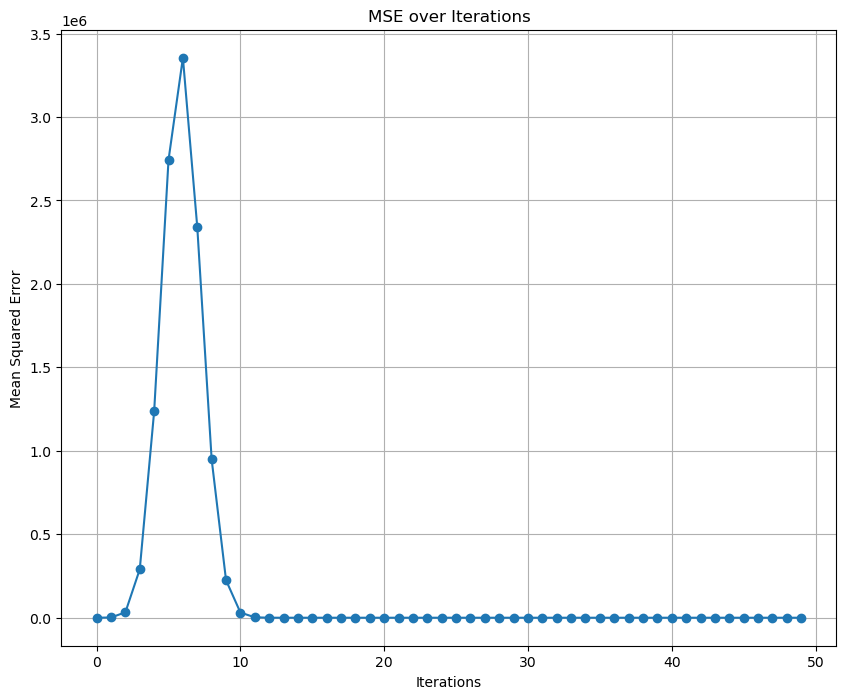

In [22]:
# Initialize the SGDRegessor with warm_start=True
sgd_regressor = SGDRegressor(max_iter=1, tol=None, warm_start=True, eta0=0.01, random_state=42)

# List to store the mean squared errors
mse_list = []

# Manually iterate and update the model
for _ in range(50):
    sgd_regressor.partial_fit(X_train, y_train)
    y_pred = sgd_regressor.predict(X_train)
    mse = mean_squared_error(y_train, y_pred)
    mse_list.append(mse)

# Plotting the MSE over iterations
plt.figure(figsize=(10, 8))
plt.plot(mse_list, marker='o')
plt.title('MSE over Iterations')
plt.xlabel('Iterations')
plt.ylabel('Mean Squared Error')
plt.grid(True)
plt.show()

-The MSE drops sharply within the first few iterations, which indicates that the model is learning and improving quickly at the start.

-After the initial descent, the MSE levels off and remains relatively flat. This suggests that the model has reached a point of diminishing returns, where additional iterations do not lead to significant improvements in MSE.

-The plateau in the MSE plot indicates that the model might have reached its capability given the current features and hyperparameters. Further improvement might require changes in the model complexity, feature engineering, or hyperparameters tuning.

-The final MSE value appears to be relatively high, which could mean that the model's predictions are still quite far from the true values. This might not be the best model, or additional features and tuning may be needed to improve performance.

The plot of actual vs predicted values:

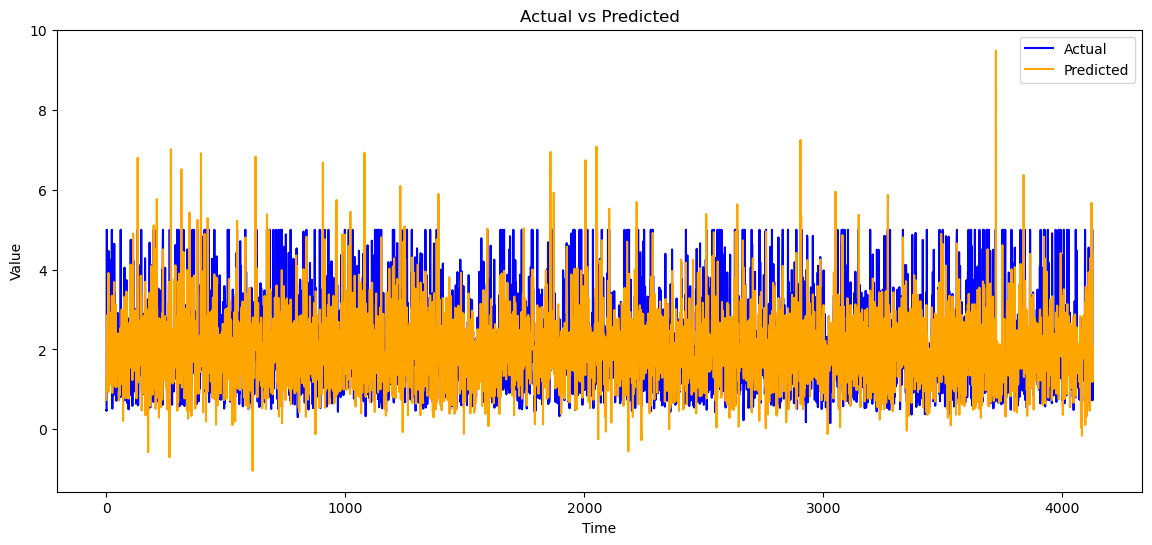

array([   0,    1,    2, ..., 4125, 4126, 4127])

In [29]:
import matplotlib.pyplot as plt

#predict on the test set
y_test_pred = sgd_regressor.predict(X_test)

# Assume 'time' is an array or a list that represents the time or sequence order
# and 'y_test' and 'y_pred' are the actual and predicted values, respectively.

time = np.arange(len(y_test)) # Replace with your actual time sequence if available

plt.figure(figsize=(14, 6))

# Plot actual values
plt.plot(time, y_test, label='Actual', color='blue')

# Plot predicted values
plt.plot(time, y_test_pred, label='Predicted', color='orange')

# Labeling the plot
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.show()


Since you can see that the lines are very densely distributed, we will focus on time less than 200 and try to analyze the result.

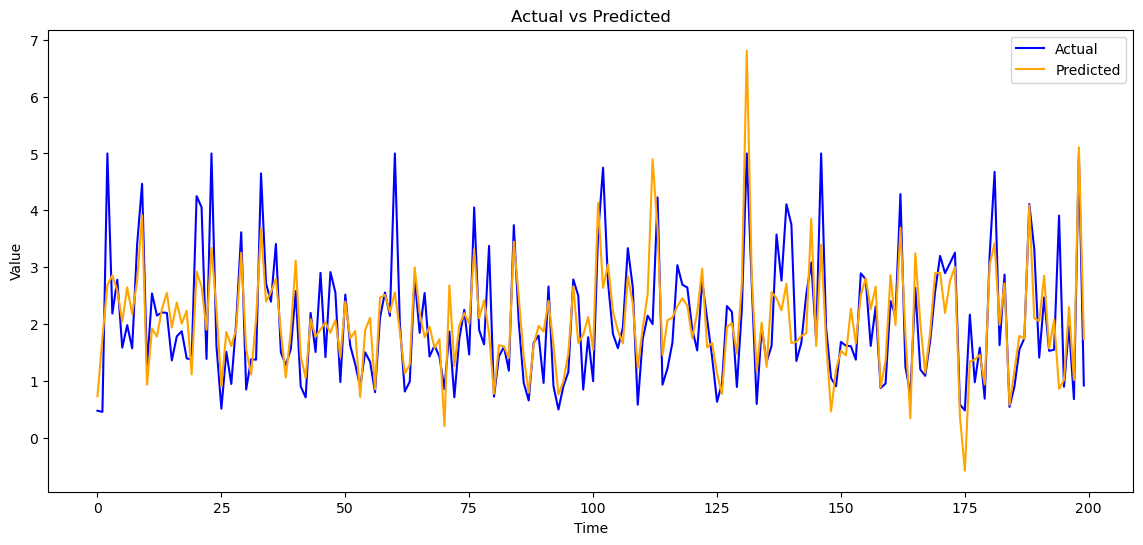

In [34]:
plt.figure(figsize=(14, 6))
#Set the time (x-axis)
number=200
time = np.arange(number)
# Plot actual values
plt.plot(time, y_test[0:number], label='Actual', color='blue')

# Plot predicted values
plt.plot(time, y_test_pred[0:number], label='Predicted', color='orange')

# Labeling the plot
plt.title('Actual vs Predicted')
plt.xlabel('Time')
plt.ylabel('Value')
plt.legend()

plt.show()

The "Actual vs Predicted" plot suggests that the model's predictions are not very accurate. While it does capture some of the overall trends in the data, there are clear discrepancies between the actual and predicted values:

1.There are several points where the predicted values either significantly overestimate or underestimate the actual values, which is evident from the divergence of the two lines.

2.The prediction line does not consistently follow the actual line, indicating that the model is not capturing the underlying pattern effectively across the entire dataset.

3.The presence of large spikes in the actual values that are not mirrored in the predictions could indicate that the model is missing key features or interactions that explain the variance in the data.